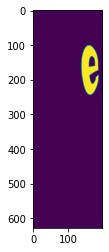

In [170]:
import ect
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tracker import ImageLoader, FilteredTransformation

radius = 200
img_offset = 10
ect_offset = 1

loader = ImageLoader("../sample_imgs/black_e.png")
transformer = FilteredTransformation(img_offset, ect_offset, radius)

stripes = loader.load()

plt.imshow(stripes)

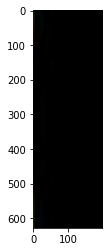

In [171]:
ect_stripes = transformer.transform(stripes)

plt.imshow(ect.complex_to_hsv(ect_stripes))

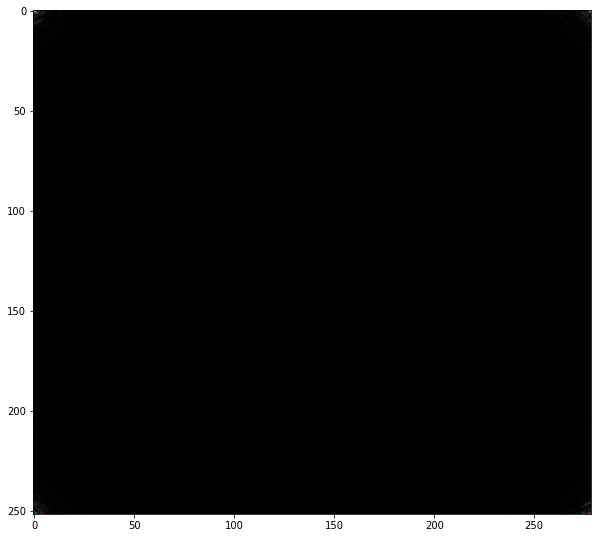

In [172]:
stripes_src = cv2.imread("../sample_imgs/black_e.png")
stripes_src = cv2.cvtColor(stripes_src, cv2.COLOR_RGB2BGR)

fft_stripes_np = np.fft.fft2(stripes_src, axes=(0, 1))
# ifft_stripes_np = np.fft.ifft2(fft_stripes_np, axes=(0, 1))

plt.figure(figsize=(10,10))
plt.imshow(ect.complex_to_hsv(fft_stripes_np))

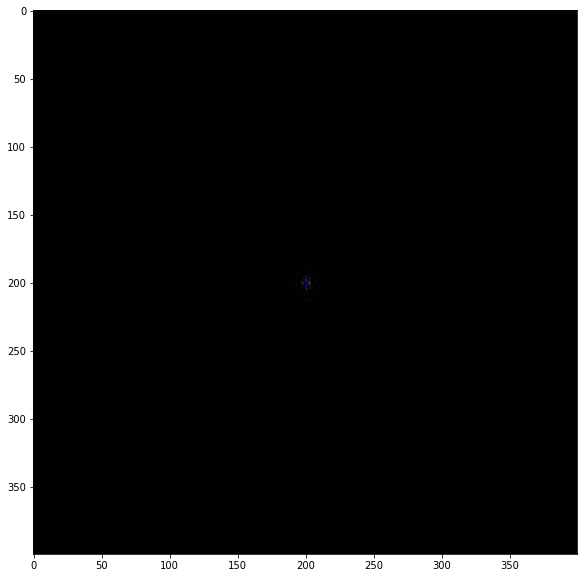

In [173]:
fft_stripes_real = ect.ilogpolar(
    np.real(ect_stripes),
    radius=radius, 
    offset=1,
    dtype=float, 
    flags=ect.ECT_INTER_NONE | ect.ECT_START_PX | ect.ECT_OFFSET_ORIGIN)

fft_stripes_imag = ect.ilogpolar(
    np.imag(ect_stripes),
    radius=radius, 
    offset=1,
    dtype=float,
    flags=ect.ECT_INTER_NONE | ect.ECT_START_PX | ect.ECT_OFFSET_ORIGIN)

plt.figure(figsize=(10,10))
plt.imshow(ect.complex_to_hsv(fft_stripes_imag))

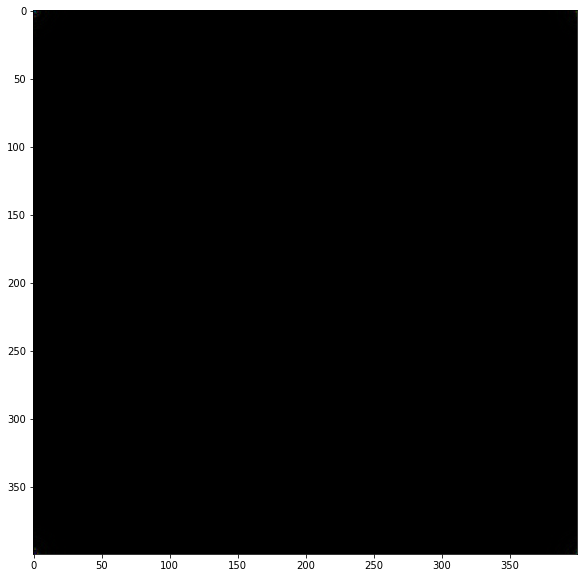

In [174]:
fft_stripes = fft_stripes_real[:, :, 1] + fft_stripes_imag[:, :, 1]*1j

X, Y = fft_stripes.shape[:2]
fft_restriped = np.zeros_like(fft_stripes)

fft_restriped[:X//2, :Y//2] = fft_stripes[X//2:, Y//2:] 
fft_restriped[X//2:, Y//2:] = fft_stripes[:X//2, :Y//2] 
fft_restriped[X//2:, :Y//2] = fft_stripes[:X//2, Y//2:]
fft_restriped[:X//2, Y//2:] = fft_stripes[X//2:, :Y//2]

fft_stripes = fft_restriped

plt.figure(figsize=(10, 10))
plt.imshow(ect.complex_to_hsv(fft_stripes))

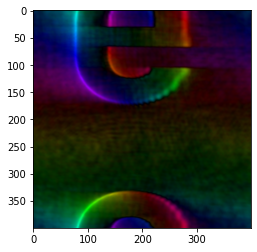

In [175]:
ifft_stripes = np.fft.ifft2(fft_stripes[::-1], axes=(0, 1))

plt.imshow(ect.complex_to_hsv(ifft_stripes))
# plt.imshow(ect.norm_minmax(np.abs(ifft_stripes), 0, 255))